<h1 style="text-align: center;"> TP2: Diagnostique du cancer de sein</h1>




<h5 style="text-align: center;">Auteur: BARGO Alfred</h5>

<h5 style="text-align: center;"> Enseignant: Dr Poulmanogo ILLY
</h5>

## Introduction

Le cancer de sein est l'un des cancers les plus fréquents représentant 25 % de tous les cancers dans le monde en 2015 d'après le site [kaggle](https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset). Ce cancer continue de faire des victimes partout dans le monde, qui sont généralement des femmes (filles ou mères de familles).

L'un des défis lié à la détection du cancer du sein est la classification des tumeurs. Des outils modernes pouvant aider à réaliser correctement cette classification sont alors les bienvenus.

De ce fait, notre objectif est de réaliser la détection automatique du type de tumeur cancéreuse à travers un outil puissant qu'est l'apprentissage machine. Pour ce faire, nous allons construire un modèle *ANN* (**A**rtificial **N**eural **N**etwork) plus précisément un modèle *MLP* (**M**ulti **L**ayers **P**erceptron) avec le framework *Tensorflow/Keras* qui maximise le taux de classification, pour la prédiction des classes (tumeur cancéreuse ou non cancéreuse).

Le dataset utilisé pour l'entraînement du modèle est **Breast cancer Wisconsin**, un dataset labellisé de la bibliothèque scikit-learn.


## I. Description du dataset
Ce jeu de données contient des données etiquetées de plusieurs caractéristiques dérivées d'images médicales extraites à travers des outils d'analyse comme l'aspirat à aiguille fine ([**FNA**](https://www.livhospital.com/fr/biopsie-fna-aspiration-aiguille-fine-utilisations)). Ces caractéristiques numériques au nombre de 30 décrivent les [caractéristiques](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data) des noyaux cellulaires présents dans l'image. Les étiquettes du datasets sont **0** ou **1**, dont **0** signifie que la tumeur est cancéreuse (**Malignes**) et **1** signifie que la tumeur est non-cancéreuse (**Benignes**). 

## II. Préparation du dataset

#### II.1 Chargement des bibliothèques et du jeu de données 

* **Chargement des bibliothèques**

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasClassifier
from sklearn.exceptions import ConvergenceWarning
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import numpy as np, random
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os

In [3]:
warnings.filterwarnings("ignore", category=UserWarning)

In [4]:
warnings.filterwarnings('ignore', category=ConvergenceWarning)

* **📥Chargement du jeu de données**

In [5]:
# Chargement du jeu de données
data=load_breast_cancer()

X=data.data         # Caractéristiques 
y=data.target       # Variable cible

#### II.2 🖼Visualisation des données chargées 

* **Affichage des dimensions**

In [6]:
# Vérification des dimensions du jeu de données
print("Format data:",X.shape)
print("Format target:",y.shape)

Format data: (569, 30)
Format target: (569,)


**Analyse :**

Le jeu de données contient:

* 30 caractéristiques sur lesquelles se base la prédiction;
* Une variable cible;
* 569 instances 

* **Visualisation des caractéristiques et de la variable de prédiction**

In [7]:
# Noms des caractéristiques et des variables cibles
feature_names=data.feature_names
target_name=data.target_names

# Affichage
print("-------------Caractéristiques---------")
print(feature_names)
print("")
print("-----------Variable de prédiction---------")
print(target_name)

-------------Caractéristiques---------
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

-----------Variable de prédiction---------
['malignant' 'benign']


**Analyse :**

Cet affichage présente les noms des 30 caratéristiques utilisées dans la classification du cancer et les deux classes à savoir *malignant* et *benign*.

* **Affichage du nombre de classes**

In [8]:
# Affichage du nombre de classes
print(np.unique(y))

[0 1]


**Analyse :**

Il y a au total 2 classes de prédictions dans la variable cible. En effet, ces deux classes de prédiction à l'origine des chaînes de caractères (**malignant** et **benign**) ont été encodé en valeurs numériques (respectivement **0** et **1**).

* **Affichage de quelques instances du jeu de données**

Affichons deux intances du dataset (la première et la dernière) pour avoir une idée des données chargées

In [9]:
# Première instance
print("######## Première instance #######")
print("")
print("------- Caractéristiques--------")
print(X[0])
print("")
print("--------- Sortie --------")
print(y[0])

print("")
print("")
# Dernière instance 
print("######## Dernière instance #######")
print("")
print("------- Caractéristiques--------")
print(X[568])
print("")
print("--------- Sortie --------")
print(y[568])

######## Première instance #######

------- Caractéristiques--------
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]

--------- Sortie --------
0


######## Dernière instance #######

------- Caractéristiques--------
[7.760e+00 2.454e+01 4.792e+01 1.810e+02 5.263e-02 4.362e-02 0.000e+00
 0.000e+00 1.587e-01 5.884e-02 3.857e-01 1.428e+00 2.548e+00 1.915e+01
 7.189e-03 4.660e-03 0.000e+00 0.000e+00 2.676e-02 2.783e-03 9.456e+00
 3.037e+01 5.916e+01 2.686e+02 8.996e-02 6.444e-02 0.000e+00 0.000e+00
 2.871e-01 7.039e-02]

--------- Sortie --------
1


**Analyse :**

* Les valeurs des caractéristiques des deux instances sont des valeurs numériques positives;
* La sortie de la première instance est **0**, ce qui indique que les caractéristiques de cette instance correspondent à celles d'une tumeur *cancéreuse*;
*  La target de la dernière instance est **1**, ce qui indique que les caractéristiques de cette instance correspondent à celles d'une tumeur *non cancéreuse*

* **Répartition des classes**

In [10]:
# Affichage de la répartition des classes
np.unique(y,return_counts=True)[1]

array([212, 357], dtype=int64)

**Interprétation :**

Le dataset présente un léger déséquilibre entre les deux classes de prédiction (0 et 1). Ce déséquilibre peut très sensible pour certains modèles et moins sensible pour d'autres.
Il nous appartient alors lors de l'évaluation des performances du modèle, d'utiliser d'autres métriques d'évaluation et de ne pas se limiter à la précision globale qui peut-être flatteur dans ce cas précis.

### II.3 Prétraitement du jeu de données 

* **Division des données en ensemble d'entraînement et de test**

Nous réalisons une division du jeu données en données d'entraînement et données test avec 80% pour l'entraînement et 20% pour le test.

In [11]:
# Separation des données 
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,
                                                random_state=42,  # Réduction de l'aléatoire
                                                 stratify=y       # Echantillonnage stratifié
                                                 )

**Résumé :**

Nous fixons random_state à 42 pour réduire les variations de la séparation a chaque session d'exécution du code. De plus, nous ajoutons l'option d'échantillonnage stratifié pour éviter d'avoir une représentation majoritaire d'une seule classe dans un sous-ensemble de données.

* **Affichage des nouvelles dimensions**

In [12]:
# Nouvelles dimensions des données séparé 
print("Format de X_train: ",X_train.shape)   # Données d'entraînement 
print("Format de X_test: ",X_test.shape)     # Données de test

Format de X_train:  (455, 30)
Format de X_test:  (114, 30)


**Analyse :**

La division du jeu de données donne 455 instances pour l'entraînement et 114 instances pour le test.

* **Normalisation des données**

In [13]:
# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Résumé :**

Il s'agit içi de normalisé les données du jeu d'entraînement pour améliorer les performances du modèle. Pour cela, nous avons utilisé la fonction **fit_transform** pour la transformation dans le jeu d'entraînement et la fonction **transform** pour appliquer cette transformation sur le jeu de test.

## III. Entraînement et évaluation de modèle MLP

### III.1 Définition du modèle

In [14]:
# modèle 
def build_model():
    model=keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)), # Couche d'entrée 
    layers.Dense(64, activation='relu'),   # Deuxième couche cachée
    layers.Dense(1, activation='sigmoid')  # Classification binaire
    ])

    model.compile(
        optimizer="adam",                 # Mise à jour des poids basée sur un pas d'aprentissage adapté(descente de gradient stochastique)
        loss='binary_crossentropy',       # Fonction de perte entropy croisé pour la classification binaire
        metrics=['accuracy','precision'],        # métriques d'évaluation
    )
    return model

* **Rénitialisation des sessions TensorFlow et Réduction de la variabilité**

Cela permet d'éviter les interférences entre les modèles successifs chaque fois que la session TensorFlow est rénitialisée. De plus, cela réduit la variabilité due à l'initialisation des poids et au processus d'optimisation tout en conservant une légère variation pour évaluer la robustesse.

In [99]:
tf.keras.backend.clear_session()

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

* **Construction du modèle**

In [100]:
model=build_model()

# Affichage d'un résumé du modèle
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,169 (12.38 KB)

 Trainable params: 3,169 (12.38 KB)

 Non-trainable params: 0 (0.00 B)

### III.2 Entraînement du modèle 

#### III.2.1 Entrainement avec variation manuelle des paramètres 

In [101]:
# Premier entrainement du modèle
#model.fit(X_train, y_train)

**Remarque :**

Une petite remarque que nous faisons est que l'entraînement successif du modèle aboutit à des performances différentes même si les paramètres d'entrées restent inchangés. On a souvent une augmentation de l'accuracy et souvent un diminution, de même pour la fonction coût.

Par la suite, nous réalisons des modifications dans le code en ajoutant des paramètres pour optimiser le modèle. Nous définissons le nombres d'époques maximum d'entraînement et aussi une taille de batch. Nous réalisons aussi une validation croisée avec un taux pour l'ensemble de validation qui est de 20%: 

In [102]:
#historique=model.fit(X_train,y_train,
#          epochs=14,            # Nombre d'époque maximum
#          batch_size=70,        # Taille de batchs
#          validation_split=0.2) # 20% des données pour la validation


**Résumé :**

* Nous avons commencé par entraîner le modèle sur 10 époques, 64 batchs et une séparation de 20% des données pour la validation.

* Par la suite, nous ré-entraînons le modèle en changeant les valeurs de ces paramètres.

* Un troisième entraînement avec le nombre d'époque égal à 15 et la taille des batchs égal à 60 montre une non variation de la précision a partir de la 14 ième époque. 

* Un quatrième entraînement avec 20 époques et une tailles des batchs égale à 40 donne un taux d'erreur égal à 0.2992. Mais le problème est que à partir de la 15 ième époque, la val_loss commence à augmenter jusqu'à atteindre la valeur de 0,3446, depassant la valeur du loss. Cela est signe d'un surapprentissage du modèle.

**Interprétation :**

La valeur du **loss** qui est la fonction d'erreur diminue au fur et à mesure de la 1 ière époque à la 20 ième. Ce qui prouve que le modèle apprend bien. Par contre, la **val_loss** qui est la valeur de la fonction de perte dans l'ensemble de validation n'est pas uniquement en décroissance de la 1 ière époque à la 20 ième époque, puisqu'à partir de la 17 ième époque elle crois légèrement. Cela montre que le modèle généralise moins bien (**Sur-apprentissage**). 

**Remarque :**

Nous remarquons que la valeur de la fonction coût (**loss**) du modèle varie chaque fois que nous modifions le nombre d'époques ou la taille des batch. Dans ces conditions, il est difficile de savoir quelles sont les valeurs qui minimisent le plus l'erreur. Pour cela, nous allons utilisé dans la suite, la méthode de GridSearchCV  de scikit-learn qui consiste à faire une recherche par validation croisée en entraînant plusieurs modèles avec plusieurs hyperparamètres possibles pour enfin choisir ceux qui maximisent le taux de classification (**notre objectif**).

### III.2.2 Entraînement avec GridSearchCV

* **EarlyStopping**

Lors des précedents entraînement, il arrive des fois qu'à partir d'un certain nombre d'époques, la *val_loss* commence a augmentée. Pour pallier à ce problème, nous utilisons *EarlyStopping* pour stopper l'exécution et revenir aux anciennes valeurs à partir du moment où val_loss commence à augmenter. Cela, en plus d'aider à résoudre le problème de surapprentissage, permet aussi de minimiser les pertes en temps de calcul.

In [103]:

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True
)


* **Wrapper scikeras**

In [104]:


clf=KerasClassifier(
    model,
    epochs=150,              # Plafond du nombre d'époques
    batch_size=40,           # Taille des batchs
    callbacks=[early_stop],  # Arrêt et retour aux anciennes valeurs 
    verbose=0
)   

* **Grid Search CV**

In [105]:
#os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

# Définition des paramètres de la grille de recherche 
param_grid={
    "epochs": [1, 150],
    "batch_size": [5, 40]      
}

grid=GridSearchCV(
    estimator=clf,
    param_grid=param_grid,    # Paramètres de la grille de recherche 
    cv=5,                     # Nombre de split du trainset pour la validation
    scoring="accuracy",       # Recherche de modèle optimal selon la précision globle
    n_jobs=1
)

Dans le GridSearchCV, les paramètres que nous avons utilisées pour la recherche sont le nombre d'époques et la taille des batchs. De plus, la recherche s'effectue sur une validation croisée de cinq ensembles et la métrique utilisée est celle de la précision globale.

In [106]:
# Lancement de GridSearchCV 
grid.fit(X_train,y_train, validation_split=0.2)

,estimator,KerasClassifi..._weight=None )
,param_grid,"{'batch_size': [5, 40], 'epochs': [1, 150]}"
,scoring,'accuracy'
,n_jobs,1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,model,"<Sequential n...l, built=True>"


* **Affichage des meilleurs hyperparamètres**

In [107]:
# Affichage 
print("Meilleur avg_accuracy:",grid.best_score_)
print("Meilleurs paramètres:",grid.best_params_)

Meilleur avg_accuracy: 0.9692307692307691
Meilleurs paramètres: {'batch_size': 40, 'epochs': 150}


**Interprétation :**

La moyenne des précisions globales des différents modèles entraîné est de 0.9692. Les valeurs du nombre d'époques et de la taille des batchs sont respectivement 150 et 40. Cela signifie que le meilleur modèle trouvé est autorisé à tester ces paramètres.

* **Meilleur modèle**

In [108]:
best_model=grid.best_estimator_.model_

### III.2.3 Evaluation après entraînement 

* **Récupération de l'historique des paramètres**

In [109]:
history = best_model.history

In [110]:
# Les métriques d'd'évaluations 
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'precision', 'val_accuracy', 'val_loss', 'val_precision'])


* **Courbes d'apprentissage**

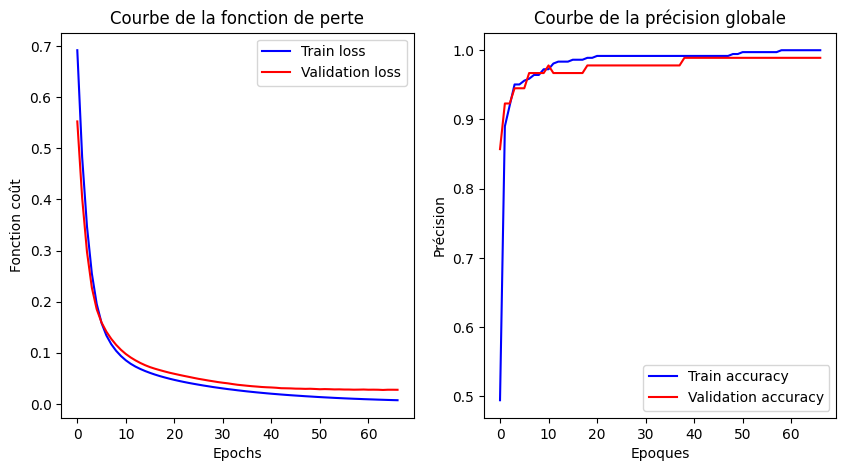

In [111]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train loss',color='blue')
plt.plot(history.history['val_loss'], label='Validation loss',color='red')
plt.xlabel('Epochs')
plt.ylabel('Fonction coût')
plt.legend()
plt.title('Courbe de la fonction de perte')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train accuracy',color='blue')
plt.plot(history.history['val_accuracy'], label='Validation accuracy',color='red')
plt.xlabel('Epoques')
plt.ylabel('Précision')
plt.legend()
plt.title('Courbe de la précision globale')
plt.show()

**Analyse :**

* Les courbes de la fonction de perte sur le jeu d'entraînement et sur le jeu de validation  décroient presque verticalement jusqu'à la dixième époque . Au debut de l'entraînement, celle du jeu de validation est plus faible que celle du jeu d'entraînement. À partir de la cinquantième époque, elles commencent à se stabiliser un peu, mais celle de l'ensemble d'entraînement continue de diminuer faiblement et se raproche de plus en plus de zéro. On remarque aussi que durant tout l'entraînement, les deux courbes sont proches, se croisent et il n'y a aucune rémontée brusque de val_loss.
* Les courbes de la précision globale sur le jeu d'entraînement et sur le jeu de validation croient tous jusqu'à la cinquantième époques où l'accuracy sur le jeu de validation commence à se stabiliser pendant que l'accuracy dans l'ensemble d'entraînement continue d'augmenter faiblement, s'approchant de 100%. Une remarque importante aussi est qu'au debut de l'entraînement, l'accuracy dans le jeu de validation est plus grande que celle dans le jeu d'entraînement.
* Dans les deux représentations graphiques, on remarque que la limites du nombre d'époques est autour de 70. Cela veut dire  alors que le meilleur modèle converge avant 150 époques (arrêt **EarlyStopping** due à la stagnation de val_loss) 


**Interprétation :**

Le fait que la fonction de perte dans le jeu de validation diminue progressivement en même temps que celle dans le jeu d'entraînement indique que le modèle ne memorise pas uniquement les données d'entraînement. Il arrive à bien généralisé sur des données non connues. De même, la cohérence (croissance) des deux courbes d'accuracy signifie que le modèle apprend bien et généralise bien aussi. La cohérence entre les courbes de la fonction de perte et ceux de l'accuracy renforce cette hypothèse.

De façon générale, il n'y a pas de surapprentissage ni de sous apprentissage du modèle. Celui-ci apprend bien et généralise bien aussi.


### III.3 Evaluation finale du modèle sur les données test

In [112]:
test_loss, test_accuracy, test_recall=best_model.evaluate(X_test, y_test, verbose=0)

# Affichage des prédictions du modèle sur les données test
print('Prédiction sur les données test')
print(f"Fonction d'erreur------->{test_loss}")
print(f'Précision globale ------>{test_accuracy}')
print(f'Rappel ----------------->{test_recall}')

Prédiction sur les données test
Fonction d'erreur------->0.10404543578624725
Précision globale ------>0.9649122953414917
Rappel ----------------->0.9857142567634583


**Analyse :**

L'évaluation finale du modèle sur les données test donne 96,49 % comme précision globale et 98,57 % comme rappel. L'erreur de prédiction sur l'ensemble test est 0.1040.

**Interprétation :**

Nous pouvons donc dire que le modèle est globalement performant. Le rappel renforce l'idée que le modèle est satisfaisant aussi.

In [113]:
# Matrice de confusion
best_model.confusion_matrix=tf.math.confusion_matrix(y_test, tf.round(best_model.predict(X_test)))
print("Matrice de confusion:\n", best_model.confusion_matrix.numpy())

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Matrice de confusion:
 [[41  1]
 [ 3 69]]


 **Interprétation :**

La matrice de confusion affiche 110 prédictions correctes sur 114. Le modèle a fait malheureusement 4 erreurs de prédictions. 

Nous pouvons estimé que notre modèle maximise le taux de prédiction et minimise les erreurs de prédictions car au dela de cela, il pourrait y avoir de surapprentissage.

## IV Sauvegarde du modèle

In [114]:
import joblib

joblib.dump(model,"model2/mlp_model.joblib")

['model2/mlp_model.joblib']

## Conclusion

En résumé, nous avons entraîner un modèle de deep learning **M**ulti **L**ayers **P**erceptron (MLP) pour la classification de tumeurs cancéreuses. À partir de 30 caractéristiques, ce modèle est capable de classer avec un taux de  précision de plus de 96%, si la tumeur est cancéreuse ou non cancéreuse.